In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('all_stocks_5yr.csv',parse_dates=True)
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [21]:
# Data.dtypes
amazon = data[data.Name == "NFLX"]

# Convert Dates
amazon.date = pd.to_datetime(amazon.date)
amazon.date = amazon.date - amazon.date.iloc[0]
amazon.date = amazon.date.apply(lambda x: x.days*1.0)

y_amaz = amazon.close.values.reshape(-1,1)
X_amaz = amazon[["open","high","low","volume","date"]]
print(y_amaz.shape,X_amaz.shape)

# print(amazon.head(),amazon.tail())
# print(amazon.date.head())
#print(amazon.date.dtype)

(1259, 1) (1259, 5)


C:\Users\alexc\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
from sklearn.model_selection import train_test_split

X_amaz_train, X_amaz_test, y_amaz_train, y_amaz_test = train_test_split(X_amaz,y_amaz) 

In [23]:
dtest = pd.to_datetime(amazon.date)
# print((dtest.iloc[0:10] - dtest.iloc[0]).apply(lambda x: x.days))
# print((dtest.iloc[2] - dtest.iloc[1]).days)

In [24]:
from sklearn.preprocessing import StandardScaler

# X_amaz_train.head()

X_amaz_scaler = StandardScaler().fit(X_amaz_train)
y_amaz_scaler = StandardScaler().fit(y_amaz_train)

In [25]:
X_train_scaled_amaz = X_amaz_scaler.transform(X_amaz_train)
X_test_scaled_amaz = X_amaz_scaler.transform(X_amaz_test)
y_train_scaled_amaz = y_amaz_scaler.transform(y_amaz_train)
y_test_scaled_amaz = y_amaz_scaler.transform(y_amaz_test)

In [26]:
from sklearn.linear_model import LinearRegression
model_amaz = LinearRegression()
model_amaz.fit(X_train_scaled_amaz,y_train_scaled_amaz)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

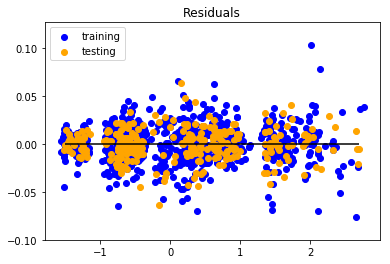

In [27]:
import matplotlib.pyplot as plt

predictions_amaz = model_amaz.predict(X_test_scaled_amaz)
model_amaz.fit(X_train_scaled_amaz, y_train_scaled_amaz)
plt.scatter(model_amaz.predict(X_train_scaled_amaz), model_amaz.predict(X_train_scaled_amaz)- y_train_scaled_amaz,c = 'blue', label = 'training')
plt.scatter(model_amaz.predict(X_test_scaled_amaz), model_amaz.predict(X_test_scaled_amaz)- y_test_scaled_amaz,c = 'orange', label = 'testing')
plt.legend()
plt.hlines(y=0,xmin=y_test_scaled_amaz.min(),xmax=y_test_scaled_amaz.max())
plt.title('Residuals')
plt.show()